# KNN Classifier with GridSearchCV Tuning

# Read the CSV and Perform Basic Data Cleaning

In [6]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
claims_param = pd.read_csv("claims_selected_features.csv")
# TEAM_CRASH copy/ML_starter_code_templates/claims_selected_features.csv

# Drop the null columns where all values are null
claims_param1 = claims_param.dropna(axis='columns', how='all')
# Drop the null rows
claims_param1.head()

,age,policy_number,insured_sex,insured_education_level,incident_date,incident_type,collision_type,incident_severity,incident_state,incident_city,...,number_of_vehicles_involved,property_damage,bodily_injuries,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,48,521585,MALE,MD,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,SC,Columbus,...,1,YES,1,71610,6510,13020,52080,Saab,92x,2004
1,42,342868,MALE,MD,2015-01-21,Vehicle Theft,?,Minor Damage,VA,Riverwood,...,1,?,0,5070,780,780,3510,Mercedes,E400,2007
2,29,687698,FEMALE,PhD,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,NY,Columbus,...,3,NO,2,34650,7700,3850,23100,Dodge,RAM,2007
3,41,227811,FEMALE,PhD,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,OH,Arlington,...,1,?,1,63400,6340,6340,50720,Chevrolet,Tahoe,2014
4,44,367455,MALE,Associate,2015-02-17,Vehicle Theft,?,Minor Damage,NY,Arlington,...,1,NO,0,6500,1300,650,4550,Accura,RSX,2009


In [9]:
claims_param1.columns

Index(['age', 'policy_number', 'insured_sex', 'insured_education_level',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year'],
      dtype='object')

In [11]:
# Set features for training & testing. This will also be used as your x values.
claims_trining_features = claims_param1[['age', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries','total_claim_amount', 'auto_year']].dropna()
# DataFrame with new columns
print(claims_trining_features.columns)

Index(['age', 'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'total_claim_amount', 'auto_year'],
      dtype='object')


# Create a Train Test Split

Use 'auto_year' for the y values

In [12]:
# X = selected_features
# y = df['incident_hour_of_the_day']
# print(X.shape, y.shape)

In [13]:
X = claims_trining_features
y = claims_trining_features['auto_year']
print(X.shape, y.shape)

(1000, 6) (1000,)


In [14]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [15]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

# Train the Model

k: 1, Train/Test Score: 1.000/0.196
k: 3, Train/Test Score: 0.509/0.124
k: 5, Train/Test Score: 0.444/0.148
k: 7, Train/Test Score: 0.393/0.136
k: 9, Train/Test Score: 0.367/0.148
k: 11, Train/Test Score: 0.348/0.144
k: 13, Train/Test Score: 0.315/0.168
k: 15, Train/Test Score: 0.304/0.140
k: 17, Train/Test Score: 0.283/0.152
k: 19, Train/Test Score: 0.283/0.136
k: 21, Train/Test Score: 0.271/0.148
k: 23, Train/Test Score: 0.263/0.152
k: 25, Train/Test Score: 0.259/0.172
k: 27, Train/Test Score: 0.249/0.156
k: 29, Train/Test Score: 0.253/0.160


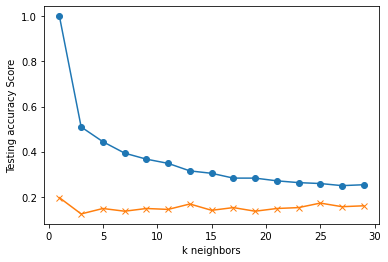

In [16]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_minmax, y_train)
    train_score = knn.score(X_train_minmax, y_train)
    test_score = knn.score(X_test_minmax, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [17]:
# Note that k: 19 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_minmax, y_train)
print('k=19 Train Acc: %.3f' % knn.score(X_train_minmax, y_train))
print('k=19 Test Acc: %.3f' % knn.score(X_test_minmax, y_test))

k=19 Train Acc: 0.283
k=19 Test Acc: 0.136


In [18]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 19,
 'p': 2,
 'weights': 'uniform'}

In [19]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
weight_options = ["uniform", "distance"]
metrics = ['euclidean', 'manhattan', 'minkowski']

param_grid = dict(n_neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29], weights = weight_options, metric=metrics)

grid = GridSearchCV(knn, param_grid, cv = 5, scoring = 'accuracy', verbose=3)
grid.fit(X_train_minmax, y_train)

e=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=13, weights=distance; total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=13, weights=distance; total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=13, weights=distance; total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=13, weights=distance; total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=13, weights=distance; total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=15, weights=uniform; total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=15, weights=uniform; total ti

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [20]:
# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.316
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
KNeighborsClassifier(metric='manhattan', n_neighbors=1)


In [21]:
knn = KNeighborsClassifier(n_neighbors=29, weights='distance', metric='manhattan')
knn.fit(X_train_minmax, y_train)
print('k=29 Train Acc: %.3f' % knn.score(X_train_minmax, y_train))
print('k=29 Test Acc: %.3f' % knn.score(X_test_minmax, y_test))

k=29 Train Acc: 1.000
k=29 Test Acc: 0.332


In [22]:
predictions = grid.predict(X_test_minmax)
predictions

array([2004, 2006, 2008, 2009, 2005, 2010, 2009, 2011, 2004, 2014, 2012,
       1999, 1999, 1995, 2012, 1998, 2015, 2006, 2007, 2002, 1997, 2002,
       2014, 2013, 2015, 2009, 2002, 2015, 1995, 2015, 2002, 1996, 1995,
       2012, 1995, 2014, 1999, 2008, 1997, 2000, 1999, 2004, 2012, 2008,
       2007, 2004, 2006, 1995, 2011, 1999, 1999, 1998, 2015, 2003, 2014,
       2009, 2011, 2005, 2013, 1999, 2011, 2011, 2013, 2002, 2009, 2005,
       2008, 2014, 2007, 1995, 1995, 2011, 1998, 2007, 2013, 2014, 2008,
       2012, 2010, 1999, 1997, 2011, 2007, 1995, 2010, 2010, 2001, 2000,
       2003, 2012, 2005, 2005, 2007, 1998, 2009, 2000, 2011, 2002, 2003,
       2006, 1995, 2008, 2005, 2005, 1998, 2007, 2015, 2010, 2015, 2009,
       2004, 1999, 2000, 2011, 2007, 2002, 2015, 1995, 2007, 2007, 2003,
       1995, 2008, 2015, 1996, 2007, 2010, 1998, 2007, 1997, 2003, 2004,
       2001, 2005, 2009, 1996, 2001, 2009, 2009, 1999, 2015, 2010, 2015,
       2013, 2014, 2007, 2011, 2013, 2006, 2013, 20

In [23]:
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test.tolist()}).reset_index(drop=True)
results

,Prediction,Actual
0,2004,2003
1,2006,2006
2,2008,2007
3,2009,2012
4,2005,2005
...,...,...
245,2006,2006
246,1999,2001
247,2005,2005
248,2013,2013


In [24]:
results.head(10)

,Prediction,Actual
0,2004,2003
1,2006,2006
2,2008,2007
3,2009,2012
4,2005,2005
5,2010,2010
6,2009,2010
7,2011,2013
8,2004,2005
9,2014,2015


In [25]:
results.tail(10)

,Prediction,Actual
240,2012,2014
241,1999,1995
242,2000,2001
243,2003,1998
244,1999,1996
245,2006,2006
246,1999,2001
247,2005,2005
248,2013,2013
249,2002,1999


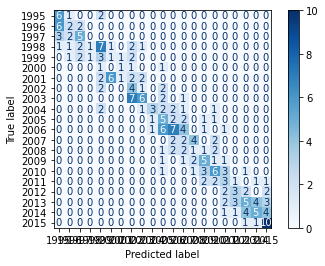

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test_minmax, y_test, cmap="Blues")
plt.show()

In [27]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, predictions,
#                             target_names=['class 1(age)', 'class 2(total_claim_amount)', 'class 3(auto_year)','class 4(incident_hour_of_the_day)', 'class 5(injury_claim)','class 6(property_claim)', 'class 7(property_claim)', 'class 8(vehicle_claim)']


In [28]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Adebayo_KNN10.sav'
joblib.dump(knn, filename)

['Adebayo_KNN10.sav']